<a href="https://colab.research.google.com/github/opi-lab/DL4CV/blob/main/notebooks/shallownet_animals_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first CNN

Andrés Marrugo, 2022

Here, we will implement a shallow CNN to classify the animals dataset. Follow the code from the Deep Learning for Computer vision book by Adrian Rosenbrock, chapters 12 and 13.

We will first train the model and then learn how to load it from disk.

Let's first download the necessary preprocessing and data loading code. We'll use ...

In [ ]:
## Download from Dropbox
!wget -O pyimagesearch.zip https://www.dropbox.com/s/mcbvf7wbrq78op3/pyimagesearch.zip?dl=0
!wget -O animals.zip https://www.dropbox.com/s/lzl3aozejtn1wmy/animals.zip?dl=0


In [ ]:
# Let's unzip everything
!unzip pyimagesearch.zip
!unzip animals.zip

In the following, I've already created the `shallownet.py` model. Let's check it out.

In [ ]:
# Let's get started with our shallownet model

filePath = "pyimagesearch/nn/conv/shallownet.py"
with open(filePath, "r") as file1:
    FileContent = file1.read()
    print(FileContent)

# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class ShallowNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last"
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# define the first (and only) CONV => RELU layer
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Flatten())
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model


Let's import the necessary packages.

Please note that due to some changes in keras you need to import SGD in the following way:

`from tensorflow.keras.optimizers import SGD` 

Instead of,

`from keras.optimizers import SGD`

as included in the book. 

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import ShallowNet
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
# imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images('animals/'))

[INFO] loading images...


In [ ]:
# initialize the image preprocessors


In [ ]:
# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]


In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing


In [ ]:
# convert the labels from integers to vectors


In [ ]:
# initialize the optimizer and model


Let's train the network.

In [ ]:
# train the network


[INFO] training network...
Epoch 1/100
71/71 [==============================] - 13s 8ms/step - loss: 1.0139 - accuracy: 0.4773 - val_loss: 1.0033 - val_accuracy: 0.4520
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.9187 - accuracy: 0.5476 - val_loss: 0.9204 - val_accuracy: 0.5360
Epoch 3/100
71/71 [==============================] - 0s 5ms/step - loss: 0.8892 - accuracy: 0.5631 - val_loss: 0.9457 - val_accuracy: 0.4973
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.8624 - accuracy: 0.5787 - val_loss: 0.9447 - val_accuracy: 0.5013
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.8513 - accuracy: 0.5773 - val_loss: 0.9265 - val_accuracy: 0.5507
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 0.8374 - accuracy: 0.5813 - val_loss: 0.8660 - val_accuracy: 0.5560
Epoch 7/100
71/71 [==============================] - 0s 5ms/step - loss: 0.8226 - accuracy: 0.6013 - val_loss: 1.0002 - val_ac

In [ ]:
# evaluate the network


[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.61      0.66      0.63       262
         dog       0.56      0.62      0.59       239
       panda       0.89      0.71      0.79       249

    accuracy                           0.67       750
   macro avg       0.69      0.67      0.67       750
weighted avg       0.69      0.67      0.67       750



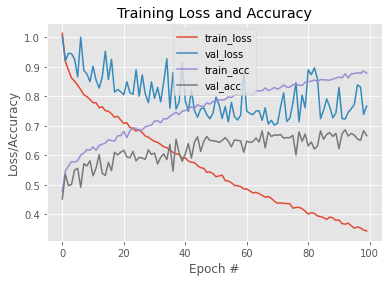

In [ ]:
# plot the training loss and accuracy


Try to adjust the learning rate or other hyperparameter. Describe what happens.

We will now save the model to disk.

In [ ]:
# save the network to disk 


[INFO] serializing network...


Let's load the model.

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import cv2

In [ ]:
# initialize the class labels


In [ ]:
# grab the list of images in the dataset then randomly sample 
# indexes into the image paths list

print("[INFO] sampling images...")

imagePaths = np.array(list(paths.list_images("animals"))) 
idxs = np.random.randint(0, len(imagePaths), size=(10,)) 
imagePaths = imagePaths[idxs]

In [ ]:
# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]


In [ ]:
# load the pre-trained network 


In [ ]:
# make predictions on the images 


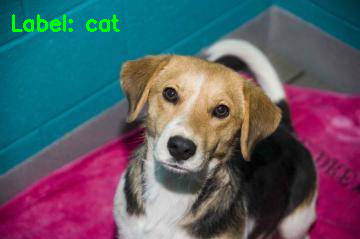

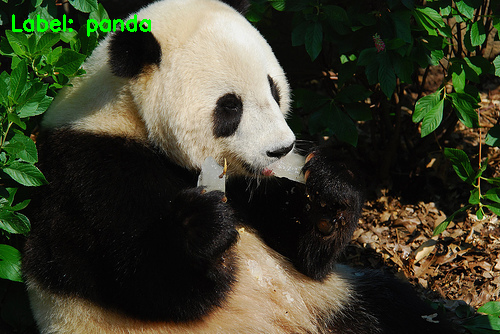

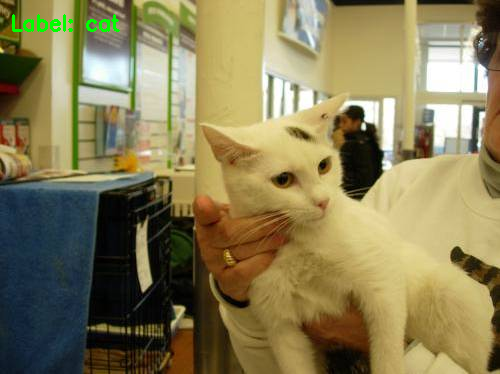

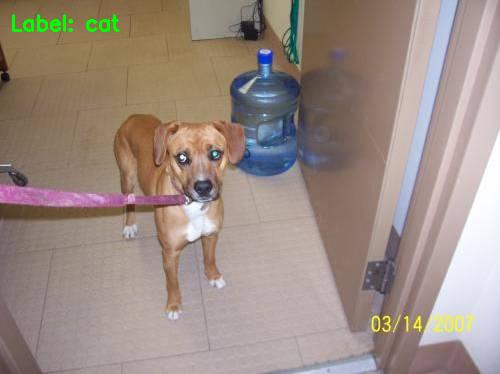

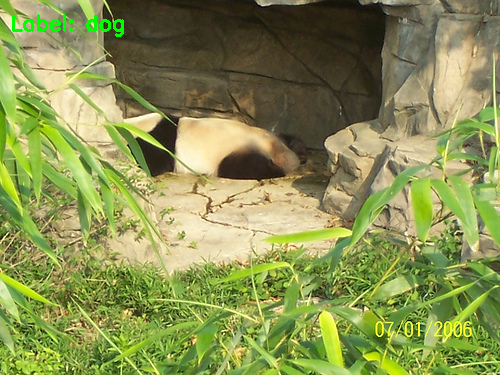

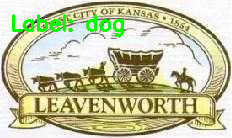

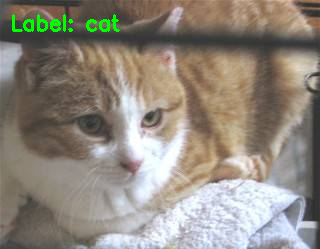

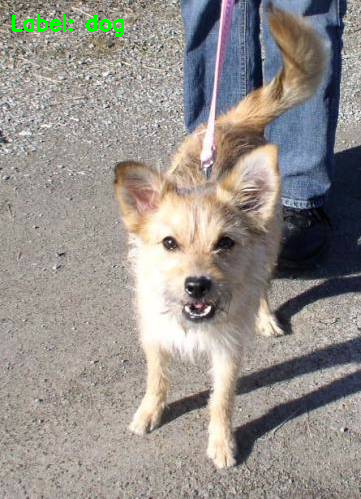

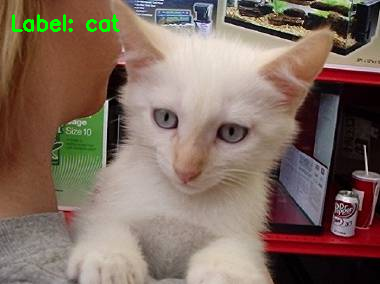

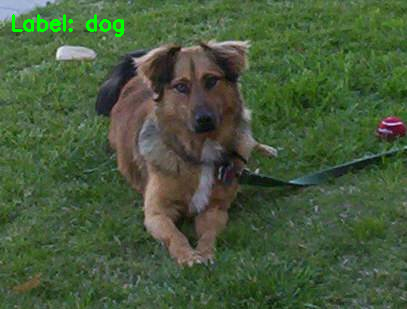

In [ ]:
# loop over the sample images

from google.colab.patches import cv2_imshow # for image display

